# Term Project: Modelling Key Properties of Transparent Conductors via Machine Learning Algorithms

### Rauf Mahmudzade 1, Dilip Depan 2 
1	University of Louisiana at Lafayette; rauf.mahmudzade1@louisiana.edu

2	University of Louisiana at Lafayette; dilip.depan@louisiana.edu 

## Part 1 - Initialization
### Part 1a - Importing Libraries

In [174]:
import numpy as np 
import pandas as pd
from sklearn import metrics

from sklearn.model_selection import GridSearchCV # Optimization function
from sklearn.linear_model import LinearRegression, Ridge # Linear Regression, Stocastic Gradient Decent
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score # Python modules to calculate different error metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
import seaborn as sns 
import plotly.express as px

### Part 1b - Preparation. Import/Read the Dataset: 

In [175]:
data_train = pd.read_csv('../Draft_Term_Paper/train.csv')

In [176]:
#Checking for null values and object types
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          2400 non-null   int64  
 1   spacegroup                  2400 non-null   int64  
 2   number_of_total_atoms       2400 non-null   float64
 3   percent_atom_al             2400 non-null   float64
 4   percent_atom_ga             2400 non-null   float64
 5   percent_atom_in             2400 non-null   float64
 6   lattice_vector_1_ang        2400 non-null   float64
 7   lattice_vector_2_ang        2400 non-null   float64
 8   lattice_vector_3_ang        2400 non-null   float64
 9   lattice_angle_alpha_degree  2400 non-null   float64
 10  lattice_angle_beta_degree   2400 non-null   float64
 11  lattice_angle_gamma_degree  2400 non-null   float64
 12  formation_energy_ev_natom   2400 non-null   float64
 13  bandgap_energy_ev           2400 

In [177]:
#Displaying the first 5 rows of train dataset
data_train.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,1,33,80.0,0.6250,0.3750,0.000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
1,2,194,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
2,3,227,40.0,0.8125,0.1875,0.000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
3,4,167,30.0,0.7500,0.0000,0.250,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
4,5,194,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793


In [178]:
#Understanding train dataset by using statistical information
data_train.describe()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
count,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000,2400.000000
mean,1200.500000,141.517917,61.679167,0.385439,0.308601,0.305958,10.030005,7.086977,12.593288,90.243666,92.398971,94.787600,0.187614,2.077205
std,692.964646,84.715548,22.598337,0.265566,0.233717,0.263198,5.645457,1.890330,5.450746,1.333655,5.299734,25.868516,0.104100,1.006845
min,1.000000,12.000000,10.000000,0.000000,0.000000,0.000000,3.037000,2.942300,5.672500,82.744100,81.641300,29.727400,0.000000,0.000100
25%,600.750000,33.000000,40.000000,0.166700,0.093800,0.062500,6.141100,5.833625,9.298000,89.999700,90.000900,89.998700,0.105600,1.278500
50%,1200.500000,194.000000,80.000000,0.375000,0.281200,0.250000,9.537450,6.382950,10.125000,90.001700,90.003550,90.000400,0.181800,1.907850
75%,1800.250000,206.000000,80.000000,0.583300,0.468800,0.468800,10.292100,9.093450,14.372050,90.006200,90.014400,119.998325,0.256275,2.761950
max,2400.000000,227.000000,80.000000,1.000000,1.000000,1.000000,24.913400,10.290300,25.346000,101.229800,106.168200,120.053500,0.657200,5.286100


In [179]:
data_test = pd.read_csv('../Draft_Term_Paper/test.csv')

In [180]:
#Checking for null values and object types
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          600 non-null    int64  
 1   spacegroup                  600 non-null    int64  
 2   number_of_total_atoms       600 non-null    float64
 3   percent_atom_al             600 non-null    float64
 4   percent_atom_ga             600 non-null    float64
 5   percent_atom_in             600 non-null    float64
 6   lattice_vector_1_ang        600 non-null    float64
 7   lattice_vector_2_ang        600 non-null    float64
 8   lattice_vector_3_ang        600 non-null    float64
 9   lattice_angle_alpha_degree  600 non-null    float64
 10  lattice_angle_beta_degree   600 non-null    float64
 11  lattice_angle_gamma_degree  600 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 56.4 KB


In [181]:
#Displaying the first 10 rows of train dataset
data_test.head()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
0,1,33,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006
1,2,33,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015
2,3,167,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,90.0109,120.0014
3,4,12,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,103.8581,90.0002
4,5,12,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,104.5929,90.0001


In [182]:
#Understanding train dataset by using statistical information
data_test.describe()

,id,spacegroup,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,300.500000,139.585000,61.733333,0.371005,0.313282,0.315711,10.097994,7.081782,12.442419,90.163120,92.485953,96.331507
std,173.349358,85.636414,22.975538,0.273049,0.245566,0.275717,5.715145,1.964818,5.442646,1.021673,5.409531,24.043137
min,1.000000,12.000000,10.000000,0.000000,0.000000,0.000000,3.073200,2.960100,5.698100,83.742600,82.753100,29.724200
25%,150.750000,33.000000,40.000000,0.125000,0.093800,0.062500,6.136725,5.829025,9.309275,89.999700,90.001100,89.998975
50%,300.500000,194.000000,80.000000,0.375000,0.250000,0.281200,9.495150,6.398400,10.096500,90.001600,90.003650,90.000400
75%,450.250000,206.000000,80.000000,0.562500,0.468800,0.468800,10.362800,9.157375,14.327925,90.006200,90.014525,119.998975
max,600.000000,227.000000,80.000000,1.000000,0.968800,0.968800,24.913400,10.249500,25.305700,100.950700,105.983800,120.054000


## Part 2: Explaratory Data Analysis

## Part 2A: Unique Space Groups

In [183]:
#Checking unique space groups in training dataset
print(f"The total number of space groups are {data_train['spacegroup'].count()}, from those the unique groups are {data_train['spacegroup'].nunique()} ")

The total number of space groups are 2400, from those the unique groups are 6 


### Note: This was an expected result. There are 230 distinct types of SGs when chiral copies are considered. These SGs are formed from the combinations of the 32 point groups with the 14 Bravais lattices.
#### Reference: https://doi.org/10.1038/s41524-020-00466-5

In [184]:
#Same principle applies to test dataset as well. 
print(f"The total number of space groups are {data_test['spacegroup'].count()}, from those the unique groups are {data_test['spacegroup'].nunique()} ")

The total number of space groups are 600, from those the unique groups are 6 


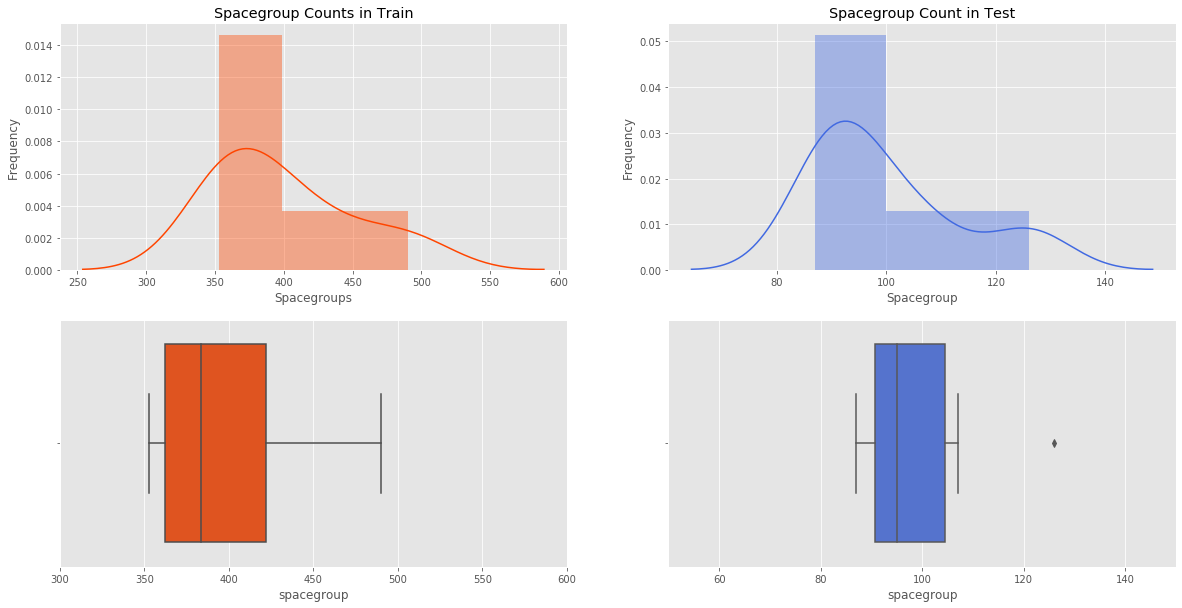

In [185]:
#Visualizing the space group distribution in test and training datasets
spacegroup_counts_train = data_train.spacegroup.value_counts()
spacegroup_counts_test = data_test.spacegroup.value_counts()

fig, ax = plt.subplots(2,2,figsize=(20,10))

sns.distplot(spacegroup_counts_train, ax=ax[0,0], color="orangered", kde=True);
ax[0,0].set_xlabel("Spacegroups")
ax[0,0].set_ylabel("Frequency")
ax[0,0].set_title("Spacegroup Counts in Train");

sns.distplot(spacegroup_counts_test, ax=ax[0,1], color="royalblue", kde=True);
ax[0,1].set_xlabel("Spacegroup")
ax[0,1].set_ylabel("Frequency")
ax[0,1].set_title("Spacegroup Count in Test");

sns.boxplot(spacegroup_counts_train, ax=ax[1,0], color="orangered");
ax[1,0].set_xlim(300, 600)
sns.boxplot(spacegroup_counts_test, ax=ax[1,1], color="royalblue");
ax[1,1].set_xlim(50, 150);

In [186]:
# Instead of a typical bar chart, I found treemaps especially useful and creative for our dataset
# Setting up color palette
orange_black = [
    '#fdc029', '#df861d', '#FF6347', '#aa3d01', '#a30e15', '#800000', '#171820'
]

# Setting plot styling.
plt.style.use('ggplot')

cntstr = data_train.spacegroup.value_counts().rename_axis('location').reset_index(
    name='count')

fig = px.treemap(cntstr,
                 path=['location'],
                 values='count',
                 color='count',
                 color_continuous_scale=orange_black,
                 title='Space Group Distribution')

fig.update_traces(textinfo='label+percent entry')
fig.show()

### Note: With this chart it became obvious that most of the TCOs in dataset belong to spacegroup #206 (Ia-3) with 20% of the trainind data
#### Reference: https://www.cryst.ehu.es/cgi-bin/cryst/programs/nph-table

Ia-3: Cubic spacegroup (diploidal):

All angles are 90 degrees.

All lattice vectors have the same length.

I stands for Innenzentriert (body-centered cubic, bcc).

![alt text](unnamed.png "Cubic")

In [187]:
#Now, let's analyze TCOs that belong to spacegroup Ia-3 (206)
data_train_206=data_train[['number_of_total_atoms','percent_atom_al','percent_atom_ga','percent_atom_in','lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang','lattice_angle_alpha_degree','lattice_angle_beta_degree','lattice_angle_gamma_degree','formation_energy_ev_natom','bandgap_energy_ev']][data_train['spacegroup'] == 206]

In [188]:
data_train_206.head()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
6,80.0,0.0312,0.0938,0.8750,10.1664,10.1664,10.1666,90.0009,90.0008,89.9987,0.0562,0.9854
8,80.0,0.5312,0.2188,0.2500,9.4027,9.4023,9.4025,90.0025,90.0030,89.9978,0.2193,2.6257
13,80.0,0.1250,0.8750,0.0000,9.3513,9.3512,9.3507,90.0059,90.0051,89.9933,0.0780,2.5371
29,80.0,0.8125,0.0312,0.1562,9.2018,9.2011,9.2015,90.0020,90.0030,89.9991,0.2106,3.3923
34,80.0,0.0000,0.5625,0.4375,9.7916,9.7916,9.7914,90.0034,90.0030,89.9955,0.1259,1.3632


In [189]:
#Some statistical information about the Ia-3 spacegroup
data_train_206.describe()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
count,490.0,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000,490.000000
mean,80.0,0.331377,0.288519,0.380102,9.601841,9.601581,9.601647,90.002605,90.002776,89.997340,0.147119,2.157506
std,0.0,0.258907,0.234237,0.315644,0.362797,0.362978,0.363046,0.001459,0.001347,0.001613,0.067773,0.991159
min,80.0,0.000000,0.000000,0.000000,8.984700,8.983900,8.984300,90.000400,90.000400,89.992500,0.000000,0.788300
25%,80.0,0.062500,0.062500,0.093800,9.297100,9.296600,9.296750,90.001300,90.001600,89.996300,0.097875,1.214950
50%,80.0,0.375000,0.281200,0.312500,9.519350,9.518950,9.519150,90.002600,90.002900,89.997400,0.131800,2.068750
75%,80.0,0.500000,0.437500,0.656200,9.922350,9.922150,9.922425,90.003700,90.003800,89.998900,0.204500,2.905275
max,80.0,1.000000,1.000000,1.000000,10.290400,10.290300,10.290700,90.006400,90.005400,89.999400,0.506900,5.211400


In [190]:
data_test_206=data_test[['number_of_total_atoms','percent_atom_al','percent_atom_ga','percent_atom_in','lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang','lattice_angle_alpha_degree','lattice_angle_beta_degree','lattice_angle_gamma_degree']][data_test['spacegroup'] == 206]

In [191]:
data_test_206.head()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
9,80.0,0.7500,0.0000,0.2500,9.3111,9.3105,9.3108,90.0016,90.0026,89.9993
14,80.0,0.0312,0.0938,0.8750,10.1664,10.1664,10.1666,90.0009,90.0008,89.9987
16,80.0,0.2500,0.3750,0.3750,9.6314,9.6312,9.6312,90.0028,90.0029,89.9967
17,80.0,0.4375,0.3125,0.2500,9.4420,9.4417,9.4417,90.0029,90.0032,89.9971
28,80.0,0.0000,0.4062,0.5938,9.9301,9.9301,9.9301,90.0025,90.0022,89.9966


In [192]:
data_test_206.describe()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
count,126.0,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,80.0,0.301583,0.296133,0.402276,9.633990,9.633753,9.633810,90.002587,90.002714,89.997291
std,0.0,0.249852,0.230722,0.315858,0.360372,0.360543,0.360622,0.001451,0.001352,0.001588
min,80.0,0.000000,0.000000,0.000000,9.037100,9.036400,9.036600,90.000400,90.000400,89.992900
25%,80.0,0.031200,0.093800,0.156200,9.353575,9.353400,9.353050,90.001225,90.001500,89.996300
50%,80.0,0.343800,0.265600,0.281200,9.519050,9.518900,9.518700,90.002600,90.002900,89.997500
75%,80.0,0.500000,0.437500,0.687500,9.983375,9.983325,9.983400,90.003300,90.003700,89.998675
max,80.0,0.875000,0.937500,0.968800,10.249600,10.249500,10.249800,90.006100,90.005300,89.999400


### Note: Same procedure will be applied for all of the space groups. Due to the differences within the lattices, their properties will significantly differ. Thus, running an algorithm on the entire dataset would not be efficient. Instead data will be divided according to the lattice information (space groups), and only then the model will be trained. 

### Second space group to analyze: SG #33 (Pna2_1) with 18% of the training data
This is a pyramidal orthorhombic spacegroup:

the three lattice vectors have different length
the three angles are 90 degrees

![alt text](Ortorhombic_2.png "Ortorhombic")

In [193]:
data_train_33=data_train[['number_of_total_atoms','percent_atom_al','percent_atom_ga','percent_atom_in','lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang','lattice_angle_alpha_degree','lattice_angle_beta_degree','lattice_angle_gamma_degree','formation_energy_ev_natom','bandgap_energy_ev']][data_train['spacegroup'] == 33]

In [194]:
data_train_33.head()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
0,80.0,0.6250,0.3750,0.0000,9.9523,8.5513,9.1775,90.0026,90.0023,90.0017,0.0680,3.4387
12,40.0,0.8125,0.1875,0.0000,4.9323,8.4765,9.1059,90.0044,90.0024,90.0015,0.0535,3.9039
20,80.0,0.0000,0.3750,0.6250,10.9377,9.3249,9.9463,89.9988,89.9980,90.0000,0.0918,1.1365
25,40.0,0.8750,0.0000,0.1250,4.9870,8.5565,9.1881,90.0055,90.0021,90.0010,0.1783,3.3353
32,40.0,0.5625,0.0000,0.4375,5.2334,8.9433,9.5725,90.0037,90.0005,90.0006,0.2342,2.1264


In [195]:
data_train_33.describe()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,68.333333,0.406251,0.262946,0.330800,8.889134,8.916058,9.541634,90.001709,90.000445,90.000840,0.169239,2.196816
std,18.202267,0.281367,0.235607,0.270231,2.359019,0.310396,0.308873,0.002258,0.001798,0.000513,0.072280,0.961137
min,40.000000,0.000000,0.000000,0.000000,4.903100,8.414200,9.046300,89.996300,89.995300,90.000000,0.025400,0.652200
25%,40.000000,0.156200,0.062500,0.093800,5.529000,8.651000,9.276900,90.000100,89.999300,90.000400,0.110850,1.366475
50%,80.000000,0.406200,0.187500,0.250000,10.137450,8.881050,9.504850,90.001700,90.001000,90.000800,0.177850,2.078900
75%,80.000000,0.625000,0.406200,0.531200,10.481400,9.167500,9.787200,90.003500,90.002000,90.001200,0.230850,2.971500
max,80.000000,0.968800,1.000000,1.000000,11.284400,9.639600,10.264500,90.005800,90.002400,90.002100,0.352000,4.679500


In [196]:
data_test_33=data_test[['number_of_total_atoms','percent_atom_al','percent_atom_ga','percent_atom_in','lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang','lattice_angle_alpha_degree','lattice_angle_beta_degree','lattice_angle_gamma_degree']][data_test['spacegroup'] == 33]

In [197]:
data_test_33.head()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
0,80.0,0.1875,0.4688,0.3438,10.5381,9.0141,9.6361,89.9997,90.0003,90.0006
1,80.0,0.7500,0.2500,0.0000,9.8938,8.5014,9.1298,90.0038,90.0023,90.0015
5,40.0,1.0000,0.0000,0.0000,4.8885,8.4018,9.0344,90.0061,90.0024,90.0013
7,80.0,0.1875,0.6875,0.1250,10.2955,8.8306,9.4505,89.9988,90.0014,90.0013
8,80.0,0.3125,0.6875,0.0000,10.0984,8.6759,9.2968,89.9995,90.0021,90.0019


In [198]:
data_test_33.describe()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.00000
mean,68.785047,0.386095,0.257012,0.356896,8.998023,8.945986,9.571461,90.001598,90.000267,90.00084
std,18.051827,0.277600,0.259308,0.292366,2.401529,0.322982,0.321889,0.002282,0.001955,0.00053
min,40.000000,0.000000,0.000000,0.000000,4.888500,8.401800,9.034400,89.996600,89.995900,90.00000
25%,40.000000,0.125000,0.062500,0.125000,5.516300,8.681750,9.308700,90.000100,89.998900,90.00040
50%,80.000000,0.375000,0.156200,0.281200,10.200300,8.865900,9.495600,90.001500,90.001000,90.00080
75%,80.000000,0.625000,0.375000,0.578150,10.570850,9.210150,9.833600,90.003700,90.001900,90.00125
max,80.000000,1.000000,0.937500,0.937500,11.269700,9.574700,10.199500,90.006100,90.002400,90.00200


### Spacegroup 227: Fd-3m
This is again a cubic spacegroup (hexoctahedral):

All angles are 90 degrees.

All lattice vectors have the same length.

F stands for Flachenzentriert (face-centered cubic, fcc). 

![alt text](Cubic-body-centered.png "Cubic Body Centered")

In [199]:
data_train_227=data_train[['number_of_total_atoms','percent_atom_al','percent_atom_ga','percent_atom_in','lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang','lattice_angle_alpha_degree','lattice_angle_beta_degree','lattice_angle_gamma_degree','formation_energy_ev_natom','bandgap_energy_ev']][data_train['spacegroup'] == 227]

In [200]:
data_train_227.head()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
2,40.0,0.8125,0.1875,0.0000,9.7510,5.6595,13.9630,90.9688,91.1228,30.5185,0.1821,2.7438
5,40.0,0.5625,0.4375,0.0000,9.8456,5.7176,14.1244,91.1235,91.3033,30.5730,0.2209,2.1633
26,40.0,0.4375,0.2500,0.3125,6.0436,6.0427,14.2577,90.0159,90.0033,120.0023,0.3518,0.9760
27,40.0,0.8750,0.1250,0.0000,9.7899,5.6664,13.9461,90.5713,90.6612,30.2512,0.2237,1.9672
31,40.0,0.0000,0.2500,0.7500,10.4296,6.1786,15.1318,96.7363,97.9868,32.4294,0.2721,0.4095


In [201]:
data_train_227.describe()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
count,393.0,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,40.0,0.440681,0.283715,0.275604,8.630084,5.945252,14.545431,91.479187,91.362545,63.746595,0.289952,1.476654
std,0.0,0.276407,0.221503,0.236882,2.006050,0.209832,0.480920,3.009116,3.328180,43.309462,0.097718,0.802300
min,40.0,0.000000,0.000000,0.000000,5.686000,5.624800,13.619000,82.744100,81.641300,29.727400,0.043400,0.000100
25%,40.0,0.187500,0.125000,0.125000,6.089200,5.790000,14.199800,90.009300,89.996600,30.289900,0.219900,0.860900
50%,40.0,0.437500,0.250000,0.312500,9.869200,5.920200,14.459200,90.774400,90.898300,30.599800,0.305900,1.443600
75%,40.0,0.625000,0.437500,0.312500,10.219300,6.041100,14.773500,91.419500,91.622600,119.999100,0.363800,2.035700
max,40.0,0.937500,0.937500,0.937500,11.140100,6.545000,16.030100,101.229800,101.044700,120.053500,0.536900,3.685100


In [202]:
data_test_227=data_test[['number_of_total_atoms','percent_atom_al','percent_atom_ga','percent_atom_in','lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang','lattice_angle_alpha_degree','lattice_angle_beta_degree','lattice_angle_gamma_degree']][data_test['spacegroup'] == 227]

In [203]:
data_test_227.head()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
13,40.0,0.4375,0.5625,0.0000,9.9758,5.7765,14.2297,90.7296,90.8478,30.2926
44,40.0,0.0625,0.6250,0.3125,6.1356,6.1343,14.6716,90.0057,90.0009,119.9982
54,40.0,0.6250,0.3750,0.0000,9.9425,5.7215,14.0782,93.2382,92.8126,30.1332
55,40.0,0.0000,0.2500,0.7500,10.9686,6.2964,15.7593,100.3830,98.8565,30.3211
59,40.0,0.6875,0.3125,0.0000,9.9080,5.7064,14.0184,92.8796,92.5517,30.1410


In [204]:
data_test_227.describe()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
count,93.0,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,40.0,0.368952,0.328629,0.302419,8.209530,5.996516,14.629049,91.043244,90.836886,73.757023
std,0.0,0.265175,0.212329,0.267443,2.066662,0.230807,0.545383,2.422655,2.506604,45.023798
min,40.0,0.000000,0.000000,0.000000,5.740400,5.659500,13.782900,83.742600,82.753100,29.724200
25%,40.0,0.125000,0.187500,0.062500,6.084100,5.792300,14.209500,90.009800,89.996100,30.323300
50%,40.0,0.375000,0.312500,0.312500,9.821900,5.961000,14.531400,90.096700,90.016600,31.905500
75%,40.0,0.562500,0.437500,0.312500,10.077700,6.093700,14.842100,91.028400,91.195200,120.000900
max,40.0,0.875000,0.875000,0.937500,11.082800,6.544500,15.939800,100.950700,99.402300,120.054000


### Spacegroup 167: R-3c
This is a rhombohedral trigonal spacegroup:

The three lattice vectors have the same length.

The three angles are different from 90 degrees in the rhombohedral from. It would seem this is the hexagonal representation of the cell with two 90 degree angles and one 120 degree angle.

A trifold symmetry axis is present.

![alt text](Hexagonal_lattice.png "Hexagonal_lattice")

In [205]:
data_train_167=data_train[['number_of_total_atoms','percent_atom_al','percent_atom_ga','percent_atom_in','lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang','lattice_angle_alpha_degree','lattice_angle_beta_degree','lattice_angle_gamma_degree','formation_energy_ev_natom','bandgap_energy_ev']][data_train['spacegroup'] == 167]

In [206]:
data_train_167.head()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
3,30.0,0.7500,0.0000,0.2500,5.0036,5.0034,13.5318,89.9888,90.0119,120.0017,0.2172,3.3492
10,60.0,0.5833,0.4167,0.0000,9.8307,4.9150,13.3346,89.9909,90.0103,120.0011,0.0581,3.8723
18,30.0,0.4167,0.3333,0.2500,5.0862,5.0858,13.6981,89.9942,90.0065,120.0010,0.1919,2.5670
21,30.0,0.5833,0.4167,0.0000,4.9153,4.9150,13.3346,89.9909,90.0103,120.0011,0.0566,3.9691
22,30.0,0.6667,0.0000,0.3333,5.0674,5.0672,13.6668,89.9903,90.0102,120.0016,0.2027,2.9122


In [207]:
data_train_167.describe()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,33.850267,0.433377,0.323415,0.243203,5.736701,5.078154,13.682106,89.993366,90.007081,120.001058,0.136141,2.896165
std,10.047556,0.264930,0.243743,0.252807,1.750092,0.176186,0.373624,0.004110,0.004660,0.000466,0.073954,1.066193
min,30.000000,0.000000,0.000000,0.000000,4.832800,4.832600,13.168300,89.984800,89.999300,119.999800,0.015000,0.943900
25%,30.000000,0.250000,0.083300,0.000000,4.956600,4.935600,13.376200,89.990150,90.003450,120.000700,0.068725,1.979825
50%,30.000000,0.416700,0.333300,0.166700,5.067400,5.024000,13.573300,89.993800,90.007500,120.001100,0.133150,2.996800
75%,30.000000,0.666700,0.500000,0.416700,5.277700,5.192800,13.926500,89.996600,90.010525,120.001500,0.190275,3.716150
max,60.000000,0.916700,1.000000,1.000000,11.070100,5.577700,14.746900,90.000700,90.016000,120.001900,0.350700,5.286100


In [208]:
data_test_167=data_test[['number_of_total_atoms','percent_atom_al','percent_atom_ga','percent_atom_in','lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang','lattice_angle_alpha_degree','lattice_angle_beta_degree','lattice_angle_gamma_degree']][data_test['spacegroup'] == 167]

In [209]:
data_test_167.head()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
2,30.0,0.6667,0.1667,0.1667,4.9811,4.9808,13.4799,89.9900,90.0109,120.0014
6,30.0,0.3333,0.6667,0.0000,4.9772,4.9768,13.4593,89.9952,90.0061,120.0005
10,30.0,0.1667,0.5000,0.3333,5.1913,5.1908,13.9162,89.9979,90.0023,120.0006
11,30.0,0.2500,0.6667,0.0833,5.0410,5.0406,13.5943,89.9967,90.0044,120.0004
27,30.0,0.2500,0.3333,0.4167,5.2138,5.2134,13.9681,89.9966,90.0034,120.0009


In [210]:
data_test_167.describe()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.00000,87.000000
mean,34.827586,0.451629,0.323277,0.225092,5.888083,5.064254,13.652701,89.993017,90.00746,120.001075
std,11.087608,0.285569,0.259896,0.258997,1.926331,0.182777,0.387280,0.004548,0.00504,0.000513
min,30.000000,0.000000,0.000000,0.000000,4.812200,4.812000,13.126800,89.983300,89.99930,119.999800
25%,30.000000,0.250000,0.083300,0.000000,4.936000,4.935600,13.376200,89.989600,90.00325,120.000650
50%,30.000000,0.416700,0.250000,0.083300,5.018500,4.997400,13.500900,89.993800,90.00750,120.001200
75%,30.000000,0.687500,0.500000,0.416700,5.342500,5.181500,13.900550,89.996600,90.01130,120.001500
max,60.000000,1.000000,0.958300,0.833300,10.901100,5.491300,14.560000,90.000700,90.01740,120.002000


### Spacegroup 12: C2/m
This is a prismatic monoclinic spacegroup:

The base is a parallellogram, i.e. 2 vectors have the same length.

Two lattice vectors are perpendicular, i.e. there is one 90 degree angle.

It is centrosymmetric, meaning there is a point in the cell with respect to which the atomic positions will be mirrored.

![alt text](Clinorhombic_prism.png "Clinorhombic_prism")

In [211]:
data_train_12=data_train[['number_of_total_atoms','percent_atom_al','percent_atom_ga','percent_atom_in','lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang','lattice_angle_alpha_degree','lattice_angle_beta_degree','lattice_angle_gamma_degree','formation_energy_ev_natom','bandgap_energy_ev']][data_train['spacegroup'] == 12]

In [212]:
data_train_12.head()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
7,20.0,0.5000,0.0000,0.5000,12.1350,3.1533,6.2880,89.9997,105.1790,90.0001,0.2243,1.7179
15,80.0,0.4375,0.1875,0.3750,24.3679,6.2545,6.1721,89.9997,104.8418,90.0001,0.1660,1.5852
17,80.0,0.0000,0.4062,0.5938,24.7650,6.5014,6.4860,90.0003,105.2410,90.0000,0.0503,1.1844
19,20.0,0.2500,0.2500,0.5000,12.2649,3.1889,6.3388,90.0000,105.0943,90.0001,0.2063,1.5596
28,80.0,0.0938,0.5000,0.4062,24.7170,6.3698,6.2742,90.0001,104.8049,90.0001,0.1898,1.1496


In [213]:
data_train_12.describe()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
count,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mean,65.921788,0.318613,0.386956,0.294429,21.643844,5.517496,6.113807,89.999838,104.572380,90.000112,0.126415,1.938706
std,25.461885,0.215864,0.222823,0.212255,5.224161,1.350332,0.241298,0.000290,0.525823,0.000058,0.087753,0.667863
min,20.000000,0.000000,0.000000,0.000000,11.941300,2.942300,5.672500,89.998900,103.659100,90.000000,0.000000,0.722000
25%,80.000000,0.156200,0.250000,0.125000,24.091325,5.942450,5.949250,89.999700,104.202400,90.000100,0.042950,1.480750
50%,80.000000,0.343800,0.375000,0.281200,24.440850,6.211500,6.107900,89.999800,104.596500,90.000100,0.125650,1.856900
75%,80.000000,0.437500,0.500000,0.406200,24.603600,6.298850,6.240900,90.000000,104.874100,90.000100,0.179850,2.251075
max,80.000000,1.000000,1.000000,1.000000,24.913400,6.676300,6.904800,90.000400,106.168200,90.000300,0.404600,4.458700


In [214]:
data_test_12=data_test[['number_of_total_atoms','percent_atom_al','percent_atom_ga','percent_atom_in','lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang','lattice_angle_alpha_degree','lattice_angle_beta_degree','lattice_angle_gamma_degree']][data_test['spacegroup'] == 12]

In [215]:
data_test_12.head()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
3,80.0,0.5625,0.4375,0.0000,24.3370,6.0091,5.7620,89.9995,103.8581,90.0002
4,80.0,0.1875,0.5000,0.3125,24.6443,6.2906,6.1589,90.0000,104.5929,90.0001
19,80.0,0.2500,0.2812,0.4688,24.5381,6.3603,6.3066,90.0000,105.0163,90.0001
22,80.0,0.3438,0.2812,0.3750,24.4654,6.2812,6.1912,89.9998,104.8096,90.0001
24,80.0,0.3438,0.6562,0.0000,24.5644,6.0713,5.8068,89.9997,103.7800,90.0002


In [216]:
data_test_12.describe()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,63.298969,0.304121,0.403671,0.292204,21.123215,5.384877,6.114490,89.999853,104.560765,90.000115
std,27.030910,0.226496,0.232492,0.217261,5.552348,1.436484,0.247384,0.000296,0.538130,0.000053
min,20.000000,0.000000,0.000000,0.000000,12.006200,2.960100,5.698100,89.999100,103.680900,90.000000
25%,20.000000,0.125000,0.250000,0.125000,12.411400,3.206100,5.954000,89.999700,104.105200,90.000100
50%,80.000000,0.312500,0.406200,0.281200,24.433400,6.211200,6.107900,89.999900,104.592900,90.000100
75%,80.000000,0.437500,0.500000,0.406200,24.617600,6.306700,6.268200,90.000100,104.906600,90.000100
max,80.000000,0.875000,0.968800,0.906200,24.913400,6.658500,6.795400,90.000300,105.983800,90.000200


### Spacegroup 194: P6_3/mmc
This is a hexagonal spacegroup (dihexagonal dipyramidal):

One angle is 120 degrees, two are 90.

Two lattice vectors have equal length.

![alt text](Hexagonal_latticeFRONT.png "Hexagonal_latticeFRONT")

In [217]:
data_train_194=data_train[['number_of_total_atoms','percent_atom_al','percent_atom_ga','percent_atom_in','lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang','lattice_angle_alpha_degree','lattice_angle_beta_degree','lattice_angle_gamma_degree','formation_energy_ev_natom','bandgap_energy_ev']][data_train['spacegroup'] == 194]

In [218]:
data_train_194.head()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
1,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
4,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793
9,80.0,0.4062,0.5938,0.000,6.2520,6.2520,23.7931,90.0172,89.9994,119.9997,0.1994,2.5187
11,80.0,0.5938,0.4062,0.000,6.1935,6.1934,23.6522,90.0189,89.9980,120.0021,0.2590,2.8805
14,80.0,0.3750,0.1250,0.500,6.6318,6.6314,24.4597,90.0152,90.0071,119.9918,0.3900,0.9251


In [219]:
data_train_194.describe()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,77.422096,0.390491,0.324893,0.284611,6.349461,6.349171,23.724908,90.011335,90.002652,119.995280,0.268976,1.760744
std,13.202327,0.262421,0.222679,0.232760,0.647446,0.647393,2.314557,0.006336,0.005360,0.005568,0.095844,0.881789
min,10.000000,0.000000,0.000000,0.000000,3.037000,3.036800,11.673600,89.994700,89.977700,119.983900,0.015600,0.371700
25%,80.000000,0.218800,0.125000,0.062500,6.242100,6.242100,23.749200,90.008700,89.999400,119.990900,0.221400,1.096400
50%,80.000000,0.375000,0.312500,0.281200,6.462100,6.461700,24.168400,90.013200,90.003300,119.994500,0.275300,1.508500
75%,80.000000,0.562500,0.468800,0.437500,6.631800,6.631400,24.483200,90.015600,90.005600,120.000100,0.335100,2.369200
max,80.000000,1.000000,1.000000,1.000000,7.099100,7.098400,25.346000,90.020500,90.014700,120.006900,0.657200,4.178500


In [220]:
data_train_194.head()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
1,80.0,0.6250,0.3750,0.000,6.1840,6.1838,23.6287,90.0186,89.9980,120.0025,0.2490,2.9210
4,80.0,0.0000,0.6250,0.375,6.6614,6.6612,24.5813,89.9960,90.0006,119.9893,0.0505,1.3793
9,80.0,0.4062,0.5938,0.000,6.2520,6.2520,23.7931,90.0172,89.9994,119.9997,0.1994,2.5187
11,80.0,0.5938,0.4062,0.000,6.1935,6.1934,23.6522,90.0189,89.9980,120.0021,0.2590,2.8805
14,80.0,0.3750,0.1250,0.500,6.6318,6.6314,24.4597,90.0152,90.0071,119.9918,0.3900,0.9251


In [221]:
data_train_194.describe()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree,formation_energy_ev_natom,bandgap_energy_ev
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,77.422096,0.390491,0.324893,0.284611,6.349461,6.349171,23.724908,90.011335,90.002652,119.995280,0.268976,1.760744
std,13.202327,0.262421,0.222679,0.232760,0.647446,0.647393,2.314557,0.006336,0.005360,0.005568,0.095844,0.881789
min,10.000000,0.000000,0.000000,0.000000,3.037000,3.036800,11.673600,89.994700,89.977700,119.983900,0.015600,0.371700
25%,80.000000,0.218800,0.125000,0.062500,6.242100,6.242100,23.749200,90.008700,89.999400,119.990900,0.221400,1.096400
50%,80.000000,0.375000,0.312500,0.281200,6.462100,6.461700,24.168400,90.013200,90.003300,119.994500,0.275300,1.508500
75%,80.000000,0.562500,0.468800,0.437500,6.631800,6.631400,24.483200,90.015600,90.005600,120.000100,0.335100,2.369200
max,80.000000,1.000000,1.000000,1.000000,7.099100,7.098400,25.346000,90.020500,90.014700,120.006900,0.657200,4.178500


In [222]:
data_test_194=data_test[['number_of_total_atoms','percent_atom_al','percent_atom_ga','percent_atom_in','lattice_vector_1_ang','lattice_vector_2_ang','lattice_vector_3_ang','lattice_angle_alpha_degree','lattice_angle_beta_degree','lattice_angle_gamma_degree']][data_test['spacegroup'] == 194]

In [223]:
data_test_194.head()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
12,80.0,0.2500,0.3125,0.4375,6.6253,6.6250,24.4733,90.0104,90.0033,119.9913
15,80.0,0.9375,0.0312,0.0312,6.1149,6.1145,23.4343,90.0072,90.0037,120.0055
18,80.0,0.5312,0.0312,0.4375,6.5370,6.5365,24.2617,90.0158,90.0126,119.9941
32,80.0,0.0000,0.7500,0.2500,6.5694,6.5693,24.4204,89.9948,90.0039,119.9908
48,80.0,0.8438,0.1562,0.0000,6.1188,6.1184,23.4644,90.0129,89.9994,120.0051


In [224]:
data_test_194.describe()

,number_of_total_atoms,percent_atom_al,percent_atom_ga,percent_atom_in,lattice_vector_1_ang,lattice_vector_2_ang,lattice_vector_3_ang,lattice_angle_alpha_degree,lattice_angle_beta_degree,lattice_angle_gamma_degree
count,90.000000,90.000000,90.00000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,74.555556,0.446527,0.28125,0.272222,6.193598,6.193296,23.178363,90.010834,90.003639,119.996086
std,18.852539,0.302332,0.25753,0.238054,0.904574,0.904523,3.292636,0.006072,0.006037,0.005977
min,10.000000,0.000000,0.00000,0.000000,3.073200,3.073000,11.767400,89.994800,89.980500,119.984300
25%,80.000000,0.226600,0.06250,0.062500,6.176750,6.176525,23.586600,90.009050,90.000375,119.992100
50%,80.000000,0.406200,0.21880,0.250000,6.416100,6.416050,24.102750,90.012350,90.003900,119.995050
75%,80.000000,0.750000,0.39840,0.437500,6.590525,6.590200,24.411925,90.015150,90.007100,120.001825
max,80.000000,0.968800,0.96880,0.937500,7.076000,7.075400,25.305700,90.020000,90.013900,120.006500


## Part 3: Kernel Ridgre Regression applied on Space Groups

### Part 3a: Kernel Ridge Regression on SG #206

In [225]:
X_columns = list(data_train_206.drop(['formation_energy_ev_natom', 'bandgap_energy_ev'], axis=1).columns)
y_columns = ['formation_energy_ev_natom', 'bandgap_energy_ev']

In [226]:
X_train_206 = data_train_206[X_columns]
y_train_206 = data_train_206[y_columns]
X_test_206 = data_test_206[X_columns]

In [247]:
from sklearn.kernel_ridge import KernelRidge

ridge_206 = KernelRidge() # Load ridge regression model
params = {'alpha': [0.1,1,10]} # A dictionary of values of regularization to test out

# cv = 5 means 5 fold cross validation on the 
ridge_regress_206 = GridSearchCV(ridge_206, params, scoring='neg_mean_squared_error', cv= 5, return_train_score=True)
# ridge_regress now becomes a GridSearch enables Ridge regression model

ridge_regress_206.fit(X_train_206, y_train_206)

print("Best parameters from GridSearch: ",ridge_regress_206.best_params_)

# Lets see what was the evaluation score for value of alpha
cvres = ridge_regress_206.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
# Visualize result
predictions_ridge_206 = ridge_regress.predict(X_test_206)

Best parameters from GridSearch:  {'alpha': 0.1}
0.19572172637470742 {'alpha': 0.1}
0.19580337946627718 {'alpha': 1}
0.2008908335168819 {'alpha': 10}


## Part 3b: Kernel Ridge Regression on SG #33

In [249]:
X_columns = list(data_train_33.drop(['formation_energy_ev_natom', 'bandgap_energy_ev'], axis=1).columns)
y_columns = ['formation_energy_ev_natom', 'bandgap_energy_ev']

X_train_33 = data_train_33[X_columns]
y_train_33 = data_train_33[y_columns]
X_test_33 = data_test_33[X_columns]

In [250]:
from sklearn.kernel_ridge import KernelRidge

ridge_33 = KernelRidge() # Load ridge regression model
params = {'alpha': [0.1,1,10]} # A dictionary of values of regularization to test out

# cv = 5 means 5 fold cross validation on the 
ridge_regress_33 = GridSearchCV(ridge_33, params, scoring='neg_mean_squared_error', cv= 5, return_train_score=True)
# ridge_regress now becomes a GridSearch enables Ridge regression model

ridge_regress_33.fit(X_train_33, y_train_33)

print("Best parameters from GridSearch: ",ridge_regress_33.best_params_)

# Lets see what was the evaluation score for value of alpha
cvres = ridge_regress_33.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
# Visualize result
predictions_ridge_33 = ridge_regress.predict(X_test_33)

Best parameters from GridSearch:  {'alpha': 0.1}
0.16180321980019657 {'alpha': 0.1}
0.16203702861214997 {'alpha': 1}
0.17104500266870248 {'alpha': 10}


## Part 3c: Kernel Ridge Regression on SG #227

In [266]:
X_columns = list(data_train_227.drop(['formation_energy_ev_natom', 'bandgap_energy_ev'], axis=1).columns)
y_columns = ['formation_energy_ev_natom', 'bandgap_energy_ev']

X_train_227 = data_train_227[X_columns]
y_train_227 = data_train_227[y_columns]
X_test_227 = data_test_227[X_columns]

In [256]:
from sklearn.kernel_ridge import KernelRidge

ridge_227 = KernelRidge() # Load ridge regression model
params = {'alpha': [0.1,1,10]} # A dictionary of values of regularization to test out

# cv = 5 means 5 fold cross validation on the 
ridge_regress_227 = GridSearchCV(ridge_227, params, scoring='neg_mean_squared_error', cv= 5, return_train_score=True)
# ridge_regress now becomes a GridSearch enables Ridge regression model

ridge_regress_227.fit(X_train_227, y_train_227)

print("Best parameters from GridSearch: ",ridge_regress_227.best_params_)

# Lets see what was the evaluation score for value of alpha
cvres = ridge_regress_227.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
# Visualize result
predictions_ridge_227 = ridge_regress.predict(X_test_227)

Best parameters from GridSearch:  {'alpha': 0.1}
0.3170565964808453 {'alpha': 0.1}
0.31759915719890514 {'alpha': 1}
0.3232499232285974 {'alpha': 10}


## Part 3d: Kernel Ridge Regression on SG #167

In [258]:
X_columns = list(data_train_167.drop(['formation_energy_ev_natom', 'bandgap_energy_ev'], axis=1).columns)
y_columns = ['formation_energy_ev_natom', 'bandgap_energy_ev']

X_train_167 = data_train_167[X_columns]
y_train_167 = data_train_167[y_columns]
X_test_167 = data_test_167[X_columns]

In [259]:
from sklearn.kernel_ridge import KernelRidge

ridge_167 = KernelRidge() # Load ridge regression model
params = {'alpha': [0.1,1,10]} # A dictionary of values of regularization to test out

# cv = 5 means 5 fold cross validation on the 
ridge_regress_167 = GridSearchCV(ridge_167, params, scoring='neg_mean_squared_error', cv= 5, return_train_score=True)
# ridge_regress now becomes a GridSearch enables Ridge regression model

ridge_regress_167.fit(X_train_167, y_train_167)

print("Best parameters from GridSearch: ",ridge_regress_167.best_params_)

# Lets see what was the evaluation score for value of alpha
cvres = ridge_regress_167.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
# Visualize result
predictions_ridge_167 = ridge_regress.predict(X_test_167)

Best parameters from GridSearch:  {'alpha': 0.1}
0.18012950912516174 {'alpha': 0.1}
0.18139811748153284 {'alpha': 1}
0.19959748821568837 {'alpha': 10}


## Part 3e: Kernel Ridge Regression on SG #12

In [261]:
X_columns = list(data_train_12.drop(['formation_energy_ev_natom', 'bandgap_energy_ev'], axis=1).columns)
y_columns = ['formation_energy_ev_natom', 'bandgap_energy_ev']

X_train_12 = data_train_12[X_columns]
y_train_12 = data_train_12[y_columns]
X_test_12 = data_test_12[X_columns]

In [269]:
from sklearn.kernel_ridge import KernelRidge

ridge_12 = KernelRidge() # Load ridge regression model
params = {'alpha': [0.1,1,10]} # A dictionary of values of regularization to test out

# cv = 5 means 5 fold cross validation on the 
ridge_regress_12 = GridSearchCV(ridge_12, params, scoring='neg_mean_squared_error', cv= 5, return_train_score=True)
# ridge_regress now becomes a GridSearch enables Ridge regression model

ridge_regress_12.fit(X_train_12, y_train_12)

print("Best parameters from GridSearch: ",ridge_regress_12.best_params_)

# Lets see what was the evaluation score for value of alpha
cvres = ridge_regress_12.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
# Visualize result
predictions_ridge_12 = ridge_regress.predict(X_test_12)

Best parameters from GridSearch:  {'alpha': 0.1}
0.14378361321176522 {'alpha': 0.1}
0.15100875976491995 {'alpha': 1}
0.16973564171672154 {'alpha': 10}


## Part 3f: Kernel Ridge Regression on SG #194

In [267]:
X_columns = list(data_train_194.drop(['formation_energy_ev_natom', 'bandgap_energy_ev'], axis=1).columns)
y_columns = ['formation_energy_ev_natom', 'bandgap_energy_ev']

X_train_194 = data_train_194[X_columns]
y_train_194 = data_train_194[y_columns]
X_test_194 = data_test_194[X_columns]

In [270]:
from sklearn.kernel_ridge import KernelRidge

ridge_194 = KernelRidge() # Load ridge regression model
params = {'alpha': [0.1,1,10]} # A dictionary of values of regularization to test out

# cv = 5 means 5 fold cross validation on the 
ridge_regress_194 = GridSearchCV(ridge_194, params, scoring='neg_mean_squared_error', cv= 5, return_train_score=True)
# ridge_regress now becomes a GridSearch enables Ridge regression model

ridge_regress_194.fit(X_train_194, y_train_194)

print("Best parameters from GridSearch: ",ridge_regress_194.best_params_)

# Lets see what was the evaluation score for value of alpha
cvres = ridge_regress_194.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
# Visualize result
predictions_ridge_194 = ridge_regress.predict(X_test_194)

Best parameters from GridSearch:  {'alpha': 0.1}
0.29233445722211493 {'alpha': 0.1}
0.29729149271435323 {'alpha': 1}
0.3015028303452145 {'alpha': 10}
